In [26]:
import sys
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph')
sys.path.append('/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Select_cluster')

sys.path.append('../')

from Generator import *
from solver import *

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import svm
from sklearn.preprocessing import normalize
import numpy as np
import networkx as nx

/Users/liushuhan/Documents/AL_GNN/Experiments/RSP/Sythentic_graph/Generator.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  node_mean = torch.tensor(group_mean[group_label[i],])


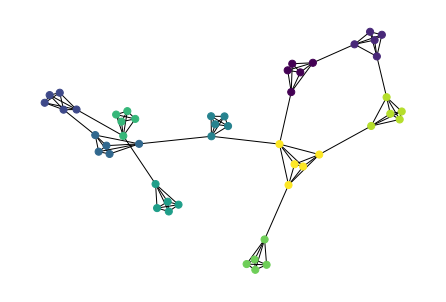

In [27]:
list_shapes = ['nx.complete_graph'] * 10
list_shapes_args = [[5]] * 10
graph_type = 'nx.connected_watts_strogatz_graph'
graph_args = [10, 2, 0.4]
G, Gg, group_label, shape_label, shape_dist = synthetic_graph_generator(list_shapes, list_shapes_args, graph_type, graph_args, \
    plot=False, plot_color='group_label', savefig=False, root=None, figname=None)
node_features, group_mean = synthetic_feature_generator(group_label, num_features=2, std=1.0, save=False, root=False) 
node_features = node_features.numpy()
group_mean = group_mean.numpy()
group_label = np.array(group_label)
L, Gamma = matrix_generator(G)
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_color=group_label, node_size=50)

### Liner kernel

The true groups for the detected outliers are: [0 1 1 1 1 2 2 2 2 3 3 3 3 3 4 5 5 7 7 7 8 9 9 9 9 9]


Text(0.5, 1.0, 'Outlier in graph')

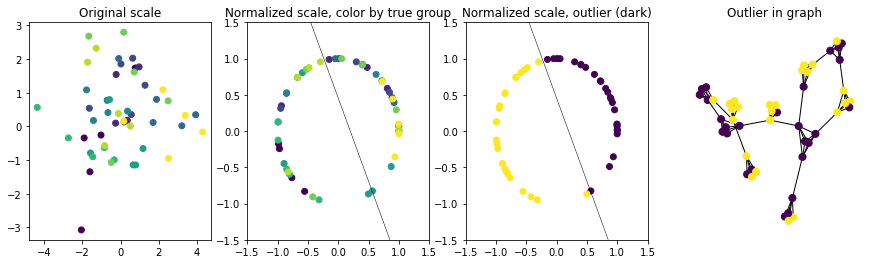

In [28]:
# Visualize normalized version of orginal node feature
X = normalize(node_features)
f = plt.figure(figsize=(15,4))
ax0 = f.add_subplot(141)
plt.scatter(node_features[:,0], node_features[:,1], c=group_label)
plt.title('Original scale')

ax1 = f.add_subplot(142)
X = normalize(node_features)
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150))
# Fit One-class SVM
clf = svm.OneClassSVM(nu=0.15, kernel="linear").fit(X)
pred_label = clf.predict(X)
# Plot the current margin
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0], X[:,1], c=group_label)
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, color by true group')

ax2 = f.add_subplot(143)
plt.scatter(X[:,0], X[:,1], c=clf.predict(X))
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, outlier (dark)')
print('The true groups for the detected outliers are:', group_label[clf.predict(X)==-1])

ax3 = f.add_subplot(144)
nx.draw(G, pos=pos, node_color=clf.predict(X), node_size=50)
ax3.set_title('Outlier in graph')


### rbf kernel

The true groups for the detected outliers are: [0 1 1 1 2 2 2 3 4 4 4 5 5 6 6 6 6 7 8 9]


Text(0.5, 1.0, 'Outlier in graph')

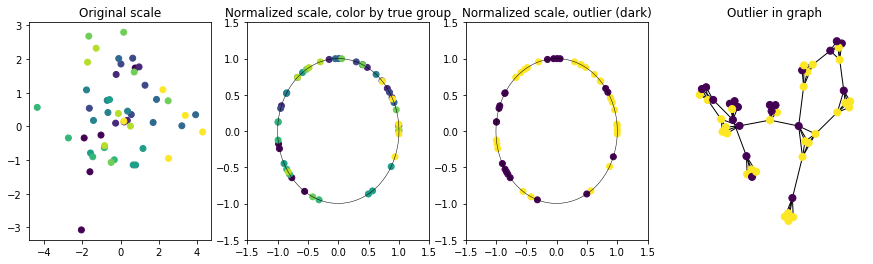

In [29]:
# Visualize normalized version of orginal node feature
X = normalize(node_features)
f = plt.figure(figsize=(15,4))
ax0 = f.add_subplot(141)
plt.scatter(node_features[:,0], node_features[:,1], c=group_label)
plt.title('Original scale')

ax1 = f.add_subplot(142)
X = normalize(node_features)
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150))
# Fit One-class SVM
clf = svm.OneClassSVM(nu=0.15, kernel="rbf").fit(X)
pred_label = clf.predict(X)
# Plot the current margin
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0], X[:,1], c=group_label)
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, color by true group')

ax2 = f.add_subplot(143)
plt.scatter(X[:,0], X[:,1], c=clf.predict(X))
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, outlier (dark)')
print('The true groups for the detected outliers are:', group_label[clf.predict(X)==-1])

ax3 = f.add_subplot(144)
nx.draw(G, pos=pos, node_color=clf.predict(X), node_size=50)
ax3.set_title('Outlier in graph')

### Smoothed with neighbor nodes, linear kernel

In [30]:
# Visualize normalized version of smoothed node feature
adj_mat = nx.adjacency_matrix(G).todense() 
adj_loop = adj_mat + np.eye(G.number_of_nodes())
adj_loop_norm = adj_loop / np.sum(adj_loop, axis=1)  # row sum
smoothed_feature = adj_loop_norm @ node_features

The true groups for the detected outliers are: [1 1 1 2 3 3 3 3 3 5 5 5 5 7 9 9 9 9 9]


Text(0.5, 1.0, 'Outlier in graph')

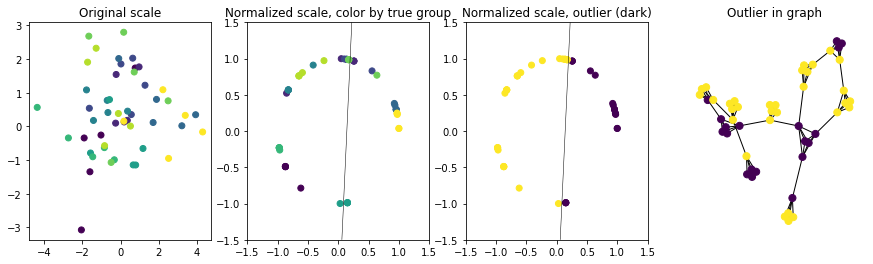

In [31]:
# Visualize normalized version of smoothed node feature
X= normalize(smoothed_feature)
f = plt.figure(figsize=(15,4))
ax0 = f.add_subplot(141)
plt.scatter(node_features[:,0], node_features[:,1], c=group_label)
plt.title('Original scale')

ax1 = f.add_subplot(142)
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150))
# Fit One-class SVM
clf = svm.OneClassSVM(nu=0.15, kernel="linear").fit(X)
pred_label = clf.predict(X)
# Plot the current margin
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0], X[:,1], c=group_label)
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, color by true group')

ax2 = f.add_subplot(143)
plt.scatter(X[:,0], X[:,1], c=clf.predict(X))
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, outlier (dark)')
print('The true groups for the detected outliers are:', group_label[clf.predict(X)==-1])

ax3 = f.add_subplot(144)
nx.draw(G, pos=pos, node_color=clf.predict(X), node_size=50)
ax3.set_title('Outlier in graph')

### Smoothed rbf

The true groups for the detected outliers are: [0 1 2 4 4 4 4 4 6 6 6 6 8 9 9]


Text(0.5, 1.0, 'Outlier in graph')

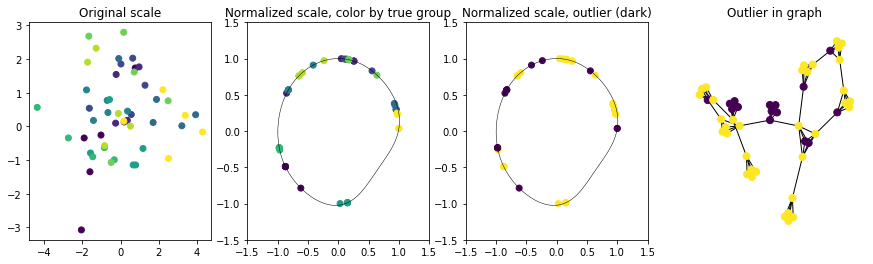

In [32]:
# Smoothed, rbf
X= normalize(smoothed_feature)
f = plt.figure(figsize=(15,4))
ax0 = f.add_subplot(141)
plt.scatter(node_features[:,0], node_features[:,1], c=group_label)
plt.title('Original scale')

ax1 = f.add_subplot(142)
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 150), np.linspace(-1.5, 1.5, 150))
# Fit One-class SVM
clf = svm.OneClassSVM(nu=0.15, kernel="rbf").fit(X)
pred_label = clf.predict(X)
# Plot the current margin
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:,0], X[:,1], c=group_label)
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, color by true group')

ax2 = f.add_subplot(143)
plt.scatter(X[:,0], X[:,1], c=clf.predict(X))
plt.contour(xx, yy, Z, levels=[0], linewidths=0.5, colors="black")
plt.title('Normalized scale, outlier (dark)')
print('The true groups for the detected outliers are:', group_label[clf.predict(X)==-1])

ax3 = f.add_subplot(144)
nx.draw(G, pos=pos, node_color=clf.predict(X), node_size=50)
ax3.set_title('Outlier in graph')